In [1]:
import os
import argparse
import cv2
import numpy as np
import sys
import glob
import importlib.util
import matplotlib.pyplot as plt

In [2]:
#!wget https://storage.googleapis.com/download.tensorflow.org/models/tflite/coco_ssd_mobilenet_v1_1.0_quant_2018_06_29.zip


In [3]:
!curl -L 'https://tfhub.dev/tensorflow/lite-model/efficientdet/lite0/detection/metadata/1?lite-format=tflite' -o efficientdet_lite0.tflite

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 4456k  100 4456k    0     0  17.6M      0 --:--:-- --:--:-- --:--:-- 17.6M


In [4]:
import zipfile

In [5]:
model_path = 'efficientdet_lite0.tflite'
with zipfile.ZipFile(model_path) as model_with_metadata:
  file_name = model_with_metadata.namelist()[0]
  with model_with_metadata.open(file_name) as label_file:
    label_list = label_file.read().splitlines()
    labels = [label.decode('ascii') for label in label_list]

In [6]:
labels

['person',
 'bicycle',
 'car',
 'motorcycle',
 'airplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 '???',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 '???',
 'backpack',
 'umbrella',
 '???',
 '???',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 '???',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'couch',
 'potted plant',
 'bed',
 '???',
 'dining table',
 '???',
 '???',
 'toilet',
 '???',
 'tv',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 '???',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair dr

In [7]:
file_name

'labelmap.txt'

In [8]:
#!unzip coco*

In [9]:
#!mkdir test

In [10]:
#!mv detect.tflite test/

In [11]:
#!mv labelmap.txt test/

In [12]:
#MODEL_NAME = 'test'
#GRAPH_NAME = 'detect.tflite'
#LABELMAP_NAME = 'labelmap.txt'

In [13]:
#!pip install tflite_runtime

In [14]:
import tensorflow as tf

In [15]:
Interpreter = tf.lite.Interpreter


In [16]:
#path_to_model = os.path.join(MODEL_NAME,GRAPH_NAME)
#path_to_label = os.path.join(MODEL_NAME,LABELMAP_NAME)

In [17]:
#with open(path_to_label, 'r') as f:
#    labels = [line.strip() for line in f.readlines()]

In [18]:
#labels

In [19]:
#if labels[0] == '???':
#    del(labels[0])

In [20]:
interpreter = Interpreter(model_path=model_path)

In [21]:
interpreter.allocate_tensors()

In [22]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
height = input_details[0]['shape'][1]
width = input_details[0]['shape'][2]

In [23]:
input_details[0]['shape']

array([  1, 320, 320,   3], dtype=int32)

In [24]:
input_details[0]['dtype']

numpy.uint8

In [25]:
floating_model = (input_details[0]['dtype'] == np.float32)

In [84]:
IM_NAME = 'testy.jpeg'

img = cv2.imread(IM_NAME)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [85]:
image = cv2.imread(IM_NAME)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

imH, imW, _ = image.shape 
image_resized = cv2.resize(image, (width, height))
input_data = np.expand_dims(image_resized, axis=0)


input_mean = 255.0/2
input_std = 255.0/2

if floating_model:
  input_data = (np.float32(input_data) - input_mean) / input_std


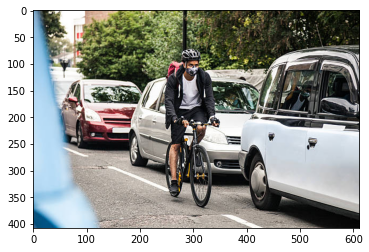

In [86]:
plt.imshow(image)
plt.show()

In [87]:
interpreter.set_tensor(input_details[0]['index'],input_data)
interpreter.invoke()

In [89]:
boxes = interpreter.get_tensor(output_details[0]['index'])[0] # Bounding box coordinates of detected objects
classes = interpreter.get_tensor(output_details[1]['index'])[0] # Class index of detected objects
scores = interpreter.get_tensor(output_details[2]['index'])[0] # Confidence of detected objects

In [90]:
boxes

array([[0.31561106, 0.08829904, 0.6343889 , 0.33093846],
       [0.16447365, 0.6442549 , 0.9878664 , 1.0065252 ],
       [0.21576303, 0.32090008, 0.8014347 , 0.56933343],
       [0.33290225, 0.762517  , 0.46820056, 0.8581326 ],
       [0.51167375, 0.4116899 , 0.90141135, 0.5444627 ],
       [0.2872193 , 0.26469424, 0.69891566, 0.75835574],
       [0.31208077, 0.87687504, 0.48681638, 0.99377453],
       [0.29856527, 0.36395013, 0.88423693, 0.66768456],
       [0.4904415 , 0.4877391 , 0.8210835 , 0.6561084 ],
       [0.20730054, 0.39674842, 0.60422444, 0.5532516 ],
       [0.21035965, 0.07593811, 0.26738098, 0.11550564],
       [0.35583213, 0.01589899, 0.9933878 , 0.29640603],
       [0.2710756 , 0.05293449, 0.4039244 , 0.15031314],
       [0.28156152, 0.0595256 , 0.5242009 , 0.15009314],
       [0.2906475 , 0.53203   , 0.8093525 , 0.7292117 ],
       [0.22867875, 0.06866755, 0.2682463 , 0.09196059],
       [0.24020597, 0.7405361 , 0.50109303, 0.992062  ],
       [0.3328815 , 0.21516444,

In [91]:
classes

array([ 2.,  2.,  0.,  0.,  1.,  2.,  0.,  2.,  2.,  0.,  2.,  2.,  2.,
        2.,  2.,  2.,  0.,  2.,  2.,  0., 26.,  2.,  9., 31.,  2.],
      dtype=float32)

In [92]:
scores

array([0.72265625, 0.66796875, 0.54296875, 0.4140625 , 0.3515625 ,
       0.27734375, 0.2421875 , 0.2421875 , 0.2265625 , 0.2109375 ,
       0.19921875, 0.18359375, 0.171875  , 0.16015625, 0.1484375 ,
       0.13671875, 0.12890625, 0.12890625, 0.1171875 , 0.1171875 ,
       0.1171875 , 0.1171875 , 0.109375  , 0.109375  , 0.109375  ],
      dtype=float32)

In [93]:
min_conf_threshold = float(0.3)

# Loop over all detections and draw detection box if confidence is above minimum threshold
for i in range(len(scores)):
  if ((scores[i] > min_conf_threshold) and (scores[i] <= 1.0)):
    # Get bounding box coordinates and draw box
    # Interpreter can return coordinates that are outside of image dimensions, need to force them to be within image using max() and min()
    ymin = int(max(1,(boxes[i][0] * imH)))
    xmin = int(max(1,(boxes[i][1] * imW)))
    ymax = int(min(imH,(boxes[i][2] * imH)))
    xmax = int(min(imW,(boxes[i][3] * imW)))
            
    cv2.rectangle(image, (xmin,ymin), (xmax,ymax), (10, 255, 0), 2)

    # Draw label
    object_name = labels[int(classes[i])] # Look up object name from "labels" array using class index
    label = '%s: %d%%' % (object_name, int(scores[i]*100)) # Example: 'person: 72%'
    labelSize, baseLine = cv2.getTextSize(label, cv2.FONT_HERSHEY_SIMPLEX, 0.7, 2) # Get font size
    label_ymin = max(ymin, labelSize[1] + 10) # Make sure not to draw label too close to top of window
    cv2.rectangle(image, (xmin, label_ymin-labelSize[1]-10), (xmin+labelSize[0], label_ymin+baseLine-10), (255, 255, 255), cv2.FILLED) # Draw white box to put label text in
    cv2.putText(image, label, (xmin, label_ymin-7), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2) # Draw label text


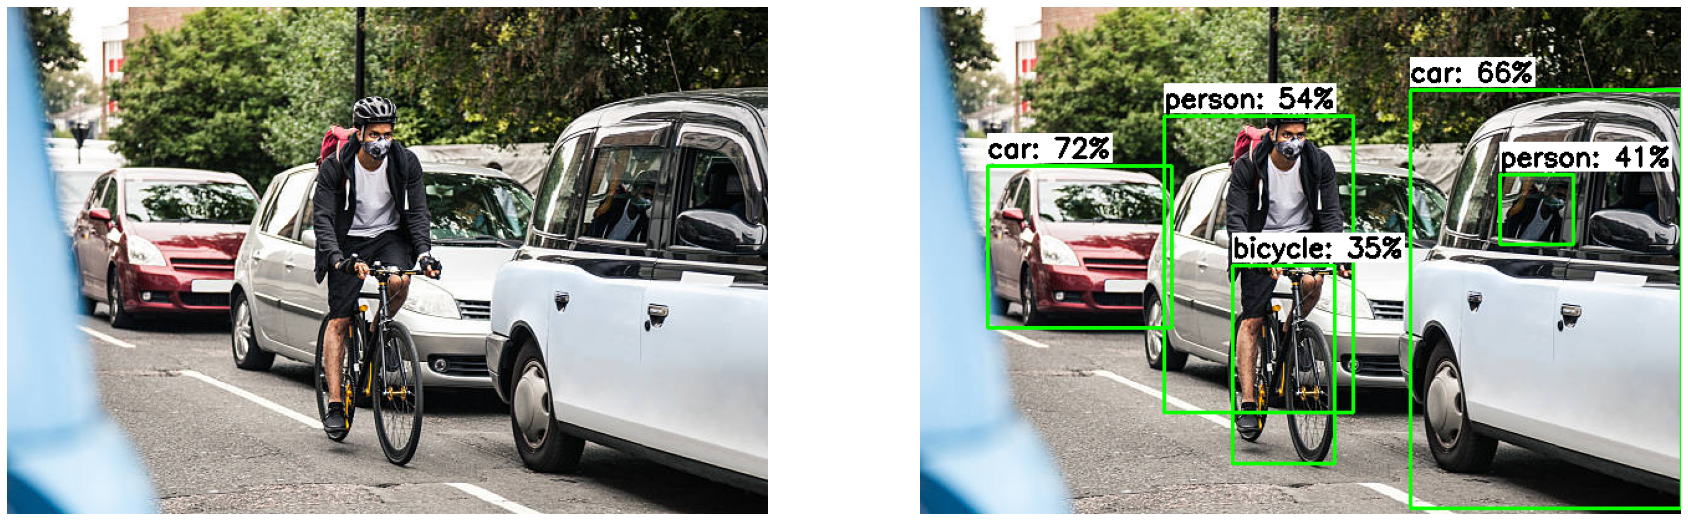

In [94]:
plt.figure(figsize=(30,30))
plt.subplot(1,2,1)
plt.imshow(img)
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(image)
plt.axis("off")
plt.show()
